Number of unique values fot attribute: Age: 41
Number of unique values fot attribute: Gender: 2
Number of unique values fot attribute: Education Level: 4
Number of unique values fot attribute: Job Title: 129
Number of unique values fot attribute: Years of Experience: 37
Number of unique values fot attribute: Salary: 437
Number of unique values fot attribute: Country: 5
Number of unique values fot attribute: Race: 10
Number of unique values fot attribute: Senior: 2
0.5390081872273554
0.6032407737399904


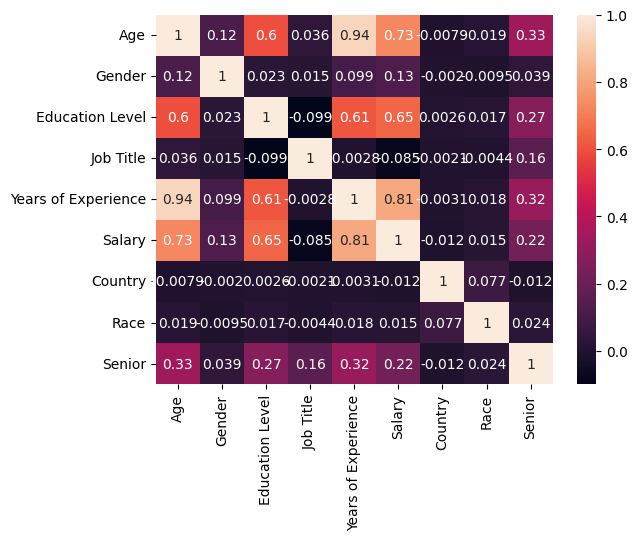

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import learning_curve

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
df=pd.read_csv('Salary.csv')
attributes=df.columns.to_list()
for attribute in attributes:
    j=[]
    for i in df[attribute]:
        if i not in j:
            j.append(i)
    print(f"Number of unique values fot attribute: {attribute}: {len(j)}")
categorical_att = [att for att in df.columns if df[att].dtype=='O']

from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

for att in categorical_att:
    df[att]=label_encoder.fit_transform(df[att])
SC=StandardScaler()
df_scaled=SC.fit_transform(df)
df_scaled=pd.DataFrame(df_scaled, columns=attributes)
sns.heatmap(df_scaled.corr(),annot=True)
y=df_scaled['Salary']
X=df_scaled.drop(['Salary'],axis=1)
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.25, random_state=42)
from sklearn.linear_model import LinearRegression
LRmodel=LinearRegression()
LRmodel.fit(X_train,y_train)
model_path = 'linear_regression_model.joblib'
joblib.dump(LRmodel, model_path)
y_pred=LRmodel.predict(X_test)
LRrmse=np.sqrt(mean_squared_error(y_pred,y_test))
print(LRrmse)
LRaccuracy=r2_score(y_pred,y_test)
print(LRaccuracy)

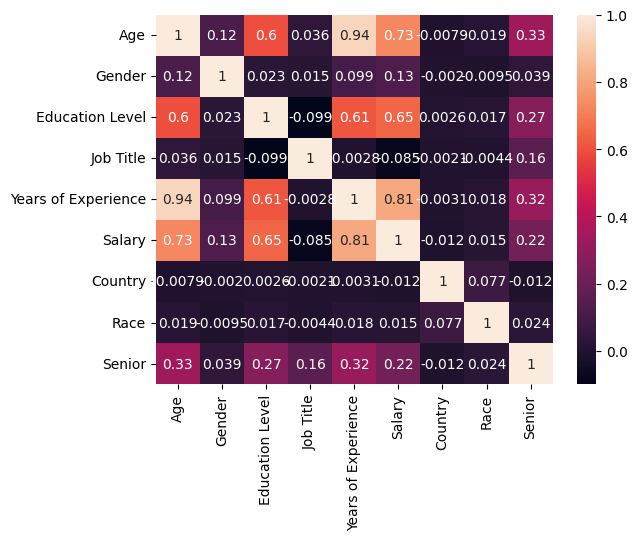

RMSE: 0.5390081872273554
R2 Score: 0.6032407737399904
Model saved to linear_regression_model.joblib


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import joblib
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression

# Load the dataset
df = pd.read_csv('Salary.csv')

# Identify categorical attributes
categorical_att = [att for att in df.columns if df[att].dtype == 'O']

# Encode categorical attributes
label_encoder = LabelEncoder()
for att in categorical_att:
    df[att] = label_encoder.fit_transform(df[att])

# Standardize the data
SC = StandardScaler()
df_scaled = SC.fit_transform(df)
df_scaled = pd.DataFrame(df_scaled, columns=df.columns)

# Plot the correlation heatmap
sns.heatmap(df_scaled.corr(), annot=True)
plt.show()

# Prepare the features and target
y = df_scaled['Salary']
X = df_scaled.drop(['Salary'], axis=1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Train the linear regression model
LRmodel = LinearRegression()
LRmodel.fit(X_train, y_train)

# Make predictions and evaluate the model
y_pred = LRmodel.predict(X_test)
LRrmse = np.sqrt(mean_squared_error(y_pred, y_test))
LRaccuracy = r2_score(y_pred, y_test)
print(f"RMSE: {LRrmse}")
print(f"R2 Score: {LRaccuracy}")

# Save the model
model_path = 'linear_regression_model.joblib'
joblib.dump(LRmodel, model_path)
print(f"Model saved to {model_path}")


In [36]:
import joblib
import pandas as pd
import numpy as np

# Load the model, scaler, and encoders
model_path = 'linear_regression_model.joblib'
scaler_path = 'scaler.joblib'
encoders_path = 'encoders.joblib'

LRmodel = joblib.load(model_path)
SC = joblib.load(scaler_path)
encoders = joblib.load(encoders_path)

print(f"Model, scaler, and encoders loaded.")

# Define a function to encode categorical attributes and handle unseen labels
def safe_encode(attribute, value, encoder):
    if value in encoder.classes_:
        return encoder.transform([value])[0]
    else:
        # If the value is unseen, return a default value (e.g., most frequent or a new category)
        return -1  # Default value for unseen labels

# Define a function to predict salary based on job title
def predict_salary(job_title):
    # Create a new DataFrame with the given job title
    new_data = pd.DataFrame({
        'Age':[0],
        'Gender': [0],
        'Education Level':[0],
        'Job Title': [job_title],
        'Years of Experience': [0],
        'Salary': 10000,
        'Country': [0],
         'Race': [0],
        'Senior':[0],
          # Placeholder value
        
              # Placeholder value
    })

    # Encode the categorical attributes
    for att in encoders:
        new_data[att] = new_data[att].apply(lambda x: safe_encode(att, x, encoders[att]))

    # Standardize the new data
    new_data_scaled = SC.transform(new_data)
    new_data_scaled = pd.DataFrame(new_data_scaled, columns=new_data.columns)

    # Prepare the features by dropping the 'Salary' column
    new_data_scaled = new_data_scaled.drop(['Salary'], axis=1)

    # Predict the salary
    predicted_salary = LRmodel.predict(new_data_scaled)[0]
    return predicted_salary

# Test the function
job_title = 'Data Scientist'
predicted_salary = predict_salary(job_title)
print(f"Predicted salary for {job_title}: ${predicted_salary:.2f}")

Model, scaler, and encoders loaded.
Predicted salary for Data Scientist: $-1.55


In [17]:
import pandas as pd
import numpy as np

# Generate synthetic data
np.random.seed(42)
n_samples = 500
data = {
    'Experience': np.random.randint(1, 20, n_samples),
    'Education': np.random.choice(['Bachelors', 'Masters', 'PhD'], n_samples),
    'Location': np.random.choice(['City_A', 'City_B', 'City_C'], n_samples),
    'JobTitle': np.random.choice(['Engineer', 'Data Scientist', 'Manager', 'Analyst'], n_samples),
    'Salary': np.random.randint(40000, 120000, n_samples)
}

# Create DataFrame
df = pd.DataFrame(data)

# Save the synthetic dataset as 'Salary.csv'
csv_path = 'Synthetic_Salary.csv'
df.to_csv(csv_path, index=False)

# Display the first few rows of the synthetic dataset
print(df.head())


   Experience  Education Location        JobTitle  Salary
0           7    Masters   City_B         Analyst   70027
1          15        PhD   City_A         Analyst  112541
2          11        PhD   City_B        Engineer   99321
3           8  Bachelors   City_B         Manager   40956
4           7    Masters   City_A  Data Scientist  114131


['Age', 'Gender', 'Education Level', 'Job Title', 'Years of Experience', 'Salary', 'Country', 'Race', 'Senior']


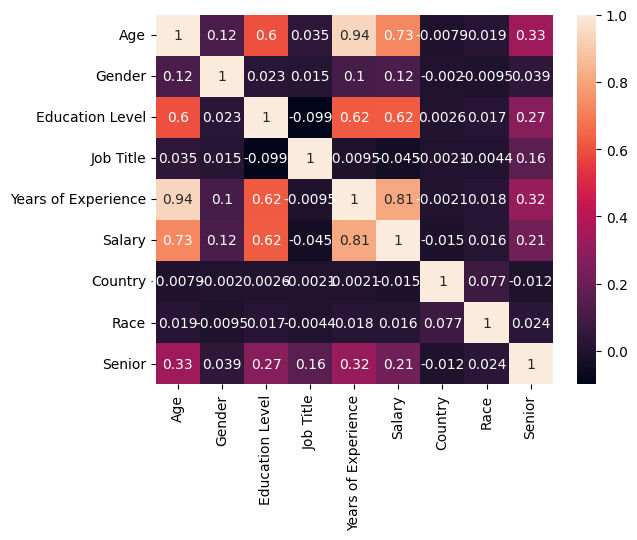

RMSE: 0.5578851544048996
R2 Score: 0.5643083876551924
Model saved to linear_regression_model.joblib
Scaler saved to scaler.joblib
Encoders saved to encoders.joblib


In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import joblib
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression

# Load the dataset
df = pd.read_csv('Salary.csv')

# Identify categorical attributes
categorical_att = [att for att in df.columns]
# Encode categorical attributes
encoders = {}
for att in categorical_att:
    label_encoder = LabelEncoder()
    df[att] = label_encoder.fit_transform(df[att])
    encoders[att] = label_encoder

# Standardize the data
SC = StandardScaler()
df_scaled = SC.fit_transform(df)
df_scaled = pd.DataFrame(df_scaled, columns=df.columns)

# Plot the correlation heatmap
sns.heatmap(df_scaled.corr(), annot=True)
plt.show()

# Prepare the features and target
y = df_scaled['Salary']
X = df_scaled.drop(['Salary'], axis=1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Train the linear regression model
LRmodel = LinearRegression()
LRmodel.fit(X_train, y_train)

# Make predictions and evaluate the model
y_pred = LRmodel.predict(X_test)
LRrmse = np.sqrt(mean_squared_error(y_pred, y_test))
LRaccuracy = r2_score(y_pred, y_test)
print(f"RMSE: {LRrmse}")
print(f"R2 Score: {LRaccuracy}")

# Save the model, encoders, and scaler
model_path = 'linear_regression_model.joblib'
scaler_path = 'scaler.joblib'
encoders_path = 'encoders.joblib'

joblib.dump(LRmodel, model_path)
joblib.dump(SC, scaler_path)
joblib.dump(encoders, encoders_path)

print(f"Model saved to {model_path}")
print(f"Scaler saved to {scaler_path}")
print(f"Encoders saved to {encoders_path}")

In [37]:
import pandas as pd
import numpy as np
import joblib
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error


# Load the dataset
# Assuming the dataset is in a CSV file called 'data.csv'
df = pd.read_csv('Salary.csv')

# Handling missing values (if any)
df = df.dropna()

# Define features and target variable
X = df.drop(columns=['Salary'])
y = df['Salary']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocessing pipeline for categorical features
categorical_features = ['Gender', 'Education Level', 'Job Title', 'Country', 'Race', 'Senior']
numerical_features = ['Age', 'Years of Experience']

# Column transformer to apply transformations to specific columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

# Create a pipeline that first transforms the data and then fits the model
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
])

# Train the model
model_pipeline.fit(X_train, y_train)

# Make predictions
y_pred = model_pipeline.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')

# Function to predict salary for a given job title and other features
def predict_salary(age, gender, education_level, job_title, years_of_experience, country, race, senior):
    input_data = pd.DataFrame([[age, gender, education_level, job_title, years_of_experience, country, race, senior]],
                              columns=['Age', 'Gender', 'Education Level', 'Job Title', 'Years of Experience', 'Country', 'Race', 'Senior'])
    return model_pipeline.predict(input_data)[0]

# Example usage
predicted_salary = predict_salary(30, 'Male', 'Bachelor', 'Data Scientist', 5, 'USA', 'White', 'No')
print(f'Predicted Salary: {predicted_salary}')


# Save the trained model to a file
joblib.dump(model_pipeline, 'salary_predictor_model.pkl')



Mean Absolute Error: 3888.2730338712227
Mean Squared Error: 77990171.27067353
Predicted Salary: 167639.13238095236


['salary_predictor_model.pkl']